$$Project Title: Customer Churn Analysis and Prediction$$

## 🤖 Task-4: Churn Prediction Model

#### Objective:

To build and evaluate machine learning models for predicting whether a customer will churn.
We’ll:

- Train models using customer features

- Evaluate their performance using accuracy, precision, recall, and F1-score

- Apply feature selection and hyperparameter tuning to improve accuracy.

In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="Set2")

### 2️⃣ Loading the Dataset

- Process: Data Preparation
- Description: Encode categorical data & scale numeric values
- Output: Clean Dataset

In [7]:
# Load dataset
data = pd.read_csv(r"C:\Users\Dell\OneDrive\Saiket Systems\Telco_Customer_Churn_Dataset.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
#Convert target column 'Churn' to binary
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [18]:
# Convert categorical columns to numeric using Label Encoding
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

In [20]:
# Separate features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [22]:
# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2️⃣ Train-Test Split

- Process: Train-test split
- Description: 80% train, 20% test
- Output: Training/test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### 3️⃣ Model Training

- Process: Model training
- Description: Logistic Regression, Decision Tree, Random Forest
- Output: Trained models

In [28]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4️⃣ Model Evaluation Function

- Process: Evaluation
- Description: Compare accuracy, precision, recall, F1
- Output: Metrics + confusion matrix

In [45]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n🔹 {name} Performance Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


🔹 Random Forest Performance Metrics:
Accuracy: 0.7921
Precision: 0.6441
Recall: 0.4840
F1-Score: 0.5527

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



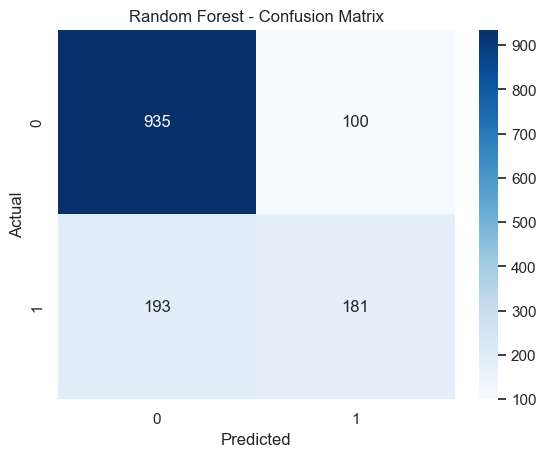

In [47]:
evaluate_model(rf, X_test, y_test, "Random Forest")

### 5️⃣ Feature Importance 

- Process: Feature importance
- Description: Identify top predictors of churn
- Output: Bar chart

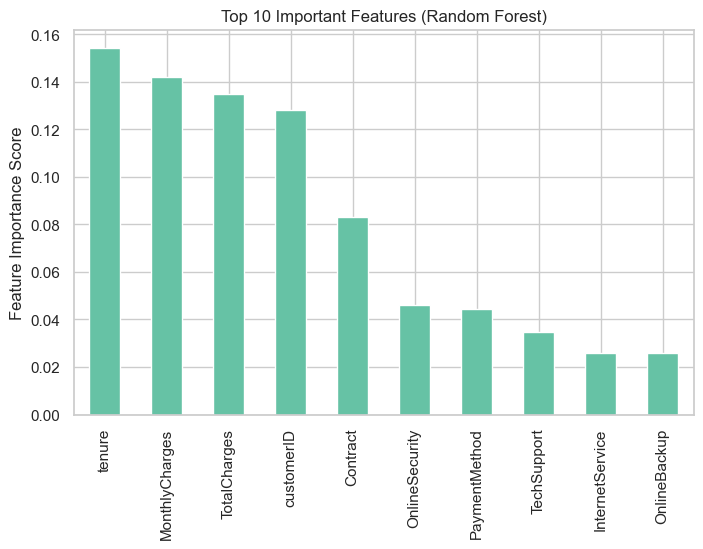

In [50]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances.head(10).plot(kind='bar')
plt.title('Top 10 Important Features (Random Forest)')
plt.ylabel('Feature Importance Score')
plt.show()

### 6️⃣ Hyperparameter Tuning

- Process: Hyperparameter tuning
- Description: Optimize Random Forest parameters
- Output: Best Model

In [53]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("\n🔹 Best Parameters Found:", grid.best_params_)
best_rf = grid.best_estimator_


🔹 Best Parameters Found: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}



🔹 Tuned Random Forest Performance Metrics:
Accuracy: 0.7991
Precision: 0.6608
Recall: 0.5000
F1-Score: 0.5693

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



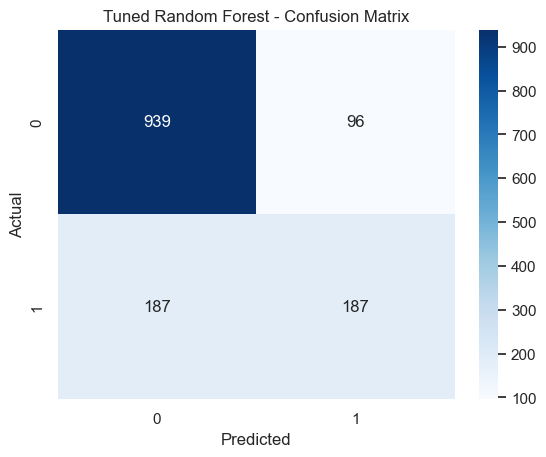

In [55]:
# Evaluate the tuned model
evaluate_model(best_rf, X_test, y_test, "Tuned Random Forest")

In [57]:
# ✅ End of Task 4
print("\n✅ Churn Prediction Model Completed Successfully!")


✅ Churn Prediction Model Completed Successfully!
